<a href="https://colab.research.google.com/github/yoheikikuta/US-patent-analysis/blob/master/colab/Comparison_ELMO_BERT_USE_W2V_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison_ELMO_BERT_USE_W2V_features

NOTE: used texts might be slightly difference due to some processing procedures.

## Prerequisites

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
GCS_BASE = "gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-extracted-feature"

target_features_dict = {
    "BERT-2ndlastmean" : ["bert_2ndlastmean_feature_train_app_3000", "bert_2ndlastmean_feature_test_app_3000", "bert_2ndlastmean_feature_grants_3000_3000"],
    "BERT-Large-2ndlastmean" : ["bert_large_2ndlastmean_feature_train_app_3000", "bert_large_2ndlastmean_feature_test_app_3000", "bert_large_2ndlastmean_feature_grants_3000_3000"],
    "ELMO-512tokenmean" : ["elmo_512_feature_train_app_3000", "elmo_512_feature_test_app_3000", "elmo_512_feature_grants_3000_3000"],
    "ELMO-4096tokenmean" : ["elmo_4096_feature_train_app_3000", "elmo_4096_feature_test_app_3000", "elmo_4096_feature_grants_3000_3000"],
    "USE" : ["use_feature_train_app_3000", "use_feature_test_app_3000", "use_feature_grants_3000_3000"],
    "W2V" : ["w2v_100_feature_train_app_3000", "w2v_100_feature_test_app_3000", "w2v_100_feature_grants_3000_3000"],
}

## Data downloading

In [39]:
!gsutil cp gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-info/citations_info_3000+3000.df.gz ./

!gsutil cp gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/training_app_3000.df.gz ./  
!gsutil cp gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/testset_app_3000.df.gz ./
!gsutil cp gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/grants_for_3000+3000.df.gz ./

Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-info/citations_info_3000+3000.df.gz...
/ [1 files][506.5 KiB/506.5 KiB]                                                
Operation completed over 1 objects/506.5 KiB.                                    
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/training_app_3000.df.gz...
\ [1 files][ 45.0 MiB/ 45.0 MiB]                                                
Operation completed over 1 objects/45.0 MiB.                                     
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/testset_app_3000.df.gz...
\ [1 files][ 45.5 MiB/ 45.5 MiB]                                                
Operation completed over 1 objects/45.5 MiB.                                     
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/grants_for_3000+3000.df.gz...
- [1 files][129.4 MiB/129.4 MiB]                                                
Operation completed over 1 objects/129.4 MiB.           

In [57]:
%%time

for model, files in target_features_dict.items():
  for f in files:
    !gsutil cp {GCS_BASE}/{model}/{f}.pkl.gz ./

Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-extracted-feature/BERT-2ndlastmean/bert_2ndlastmean_feature_train_app_3000.pkl.gz...
/ [1 files][  9.4 MiB/  9.4 MiB]                                                
Operation completed over 1 objects/9.4 MiB.                                      
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-extracted-feature/BERT-2ndlastmean/bert_2ndlastmean_feature_test_app_3000.pkl.gz...
- [1 files][  9.4 MiB/  9.4 MiB]                                                
Operation completed over 1 objects/9.4 MiB.                                      
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-extracted-feature/BERT-2ndlastmean/bert_2ndlastmean_feature_grants_3000_3000.pkl.gz...
- [1 files][ 20.1 MiB/ 20.1 MiB]                                                
Operation completed over 1 objects/20.1 MiB.                                     
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-extracted-featu

In [58]:
!ls

adc.json
bert_2ndlastmean_feature_grants_3000_3000.pkl.gz
bert_2ndlastmean_feature_test_app_3000.pkl.gz
bert_2ndlastmean_feature_train_app_3000.pkl.gz
bert_large_2ndlastmean_feature_grants_3000_3000.pkl.gz
bert_large_2ndlastmean_feature_test_app_3000.pkl.gz
bert_large_2ndlastmean_feature_train_app_3000.pkl.gz
citations_info_3000+3000.df.gz
elmo_4096_feature_grants_3000_3000.pkl.gz
elmo_4096_feature_test_app_3000.pkl.gz
elmo_4096_feature_train_app_3000.pkl.gz
elmo_512_feature_grants_3000_3000.pkl.gz
elmo_512_feature_test_app_3000.pkl.gz
elmo_512_feature_train_app_3000.pkl.gz
grants_for_3000+3000.df.gz
sample_data
testset_app_3000.df.gz
training_app_3000.df.gz
use_feature_grants_3000_3000.pkl.gz
use_feature_test_app_3000.pkl.gz
use_feature_train_app_3000.pkl.gz
w2v_100_feature_grants_3000_3000.pkl.gz
w2v_100_feature_test_app_3000.pkl.gz
w2v_100_feature_train_app_3000.pkl.gz


## Binary classification problem using the extracted fesatures

In [0]:
import pandas as pd
import numpy as np

In [0]:
citations_info_target = pd.read_pickle("./citations_info_3000+3000.df.gz")
test_app = pd.read_pickle("./testset_app_3000.df.gz")
grants = pd.read_pickle("./grants_for_3000+3000.df.gz")
train_app = pd.read_pickle("./training_app_3000.df.gz")

In [0]:
train_data = pd.merge(train_app, citations_info_target, on='app_id')[["app_id", "parsed"]]
dev_data = pd.merge(test_app, citations_info_target, on='app_id')[["app_id", "parsed"]]

In [0]:
train_data['label'] = 1
dev_data['label'] = 1

In [63]:
train_data.head()

,app_id,parsed,label
0,12130785,7212849,1
1,12652424,7814459,1
2,12652424,7814459,1
3,12214532,7652956,1
4,14204411,7439432,1


In [0]:
def pick_up_uncited_grants(df, app_id, n=1, random_state=23):
    '''
    Randomly pick up uncited grant pair to a given app_id for generating negative samples.
    '''
    n_rows = df[ df['app_id'] != app_id ].sample(n=n, random_state=random_state)
    
    return [n_rows['parsed'].values[0], 0]

In [65]:
seed = 23

train_non_cited_data = pd.DataFrame([
    [app_id] + pick_up_uncited_grants(train_data, app_id, random_state=seed+idx)
    for idx, (app_id)
    in enumerate(train_data['app_id'])
])

train_non_cited_data.columns = train_data.columns

train_non_cited_data.head()

,app_id,parsed,label
0,12130785,7848141,0
1,12652424,7992009,0
2,12652424,7896548,0
3,12214532,7236946,0
4,14204411,6910200,0


In [66]:
seed = 23

dev_non_cited_data = pd.DataFrame([
    [app_id] + pick_up_uncited_grants(dev_data, app_id, random_state=seed+idx)
    for idx, (app_id)
    in enumerate(dev_data['app_id'])
])

dev_non_cited_data.columns = dev_data.columns

dev_non_cited_data.head()

,app_id,parsed,label
0,12211548,7264313,0
1,12765236,7294763,0
2,12827269,7559338,0
3,14436491,8012217,0
4,13633425,8305811,0


In [67]:
train_data = pd.concat([train_data, train_non_cited_data]).reset_index(drop=True)
dev_data = pd.concat([dev_data, dev_non_cited_data]).reset_index(drop=True)

train_data = train_data.sample(frac=1, random_state=seed).reset_index(drop=True)
dev_data = dev_data.sample(frac=1, random_state=seed).reset_index(drop=True)

train_data.head()

,app_id,parsed,label
0,12000676,7751044,0
1,12507166,7519470,1
2,12852271,6963389,0
3,12871308,7917688,1
4,13796666,7111455,1


In [0]:
def _read_feature(target_dict, model):
  train_fpath, test_fpath, grant_fpath = target_dict[model]
  train_app_f = pd.read_pickle(f"./{train_fpath}.pkl.gz")
  test_app_f = pd.read_pickle(f"./{test_fpath}.pkl.gz")
  grant_f = pd.read_pickle(f"./{grant_fpath}.pkl.gz")
  
  assert 3000 == train_app_f.shape[0]
  assert 3000 == test_app_f.shape[0]
  assert 6440 == grant_f.shape[0]
  
  return train_app_f, test_app_f, grant_f

In [0]:
def _prepare_feature_for_labeled_data(target_dict, model):
  train_app_f, test_app_f, grant_f = _read_feature(target_dict, model)
  
  train_feature = np.empty((len(train_data), train_app_f.shape[1] + grant_f.shape[1]))
  test_feature = np.empty((len(dev_data), test_app_f.shape[1] + grant_f.shape[1]))
  
  for i in range(len(train_data)):
    app_id = train_data["app_id"][i]
    idx_app = train_app[train_app["app_id"] == app_id ].index.values[0]

    parsed = train_data["parsed"][i]
    idx_grant = grants[grants["parsed"] == parsed].index.values[0]

    f = np.concatenate([train_app_f[idx_app], grant_f[idx_grant]])
    train_feature[i] = f

  for i in range(len(dev_data)):
    app_id = dev_data["app_id"][i]
    idx_app = test_app[test_app["app_id"] == app_id ].index.values[0]

    parsed = dev_data["parsed"][i]
    idx_grant = grants[grants["parsed"] == parsed].index.values[0]

    f = np.concatenate([test_app_f[idx_app], grant_f[idx_grant]])
    test_feature[i] = f

  train_label = np.array(train_data["label"].values.tolist())
  test_label = np.array(dev_data["label"].values.tolist())
    
  return train_feature, train_label, test_feature, test_label

### Classification with lightgbm

In [0]:
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 250,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_child_weight': 2,
    'gamma': 0.2,
    'verbose': -1,
    'verbose_eval' : -1
}

In [0]:
def exp(target_dict, model):
  train_x, train_y, test_x, test_y = _prepare_feature_for_labeled_data(target_dict, model)
  lgb_train = lgb.Dataset(train_x[:2500], train_y[:2500])
  lgb_valid = lgb.Dataset(train_x[2500:], train_y[2500:])

  # Train a model.
  gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                early_stopping_rounds=10,
                valid_sets=lgb_valid)
  
  def _compute_acc(x, y):
    predict_prob = gbm.predict(x)
    predict_label = [ 1 if elem >= 0.5 else 0 for elem in predict_prob]
    acc = sum( np.array(predict_label) == np.array(y) ) / len(predict_label)
    return acc
  
  return _compute_acc(train_x, train_y), _compute_acc(test_x, test_y)

In [72]:
%%time

result = []

for model in target_features_dict.keys():
  print(f"Training a model using {model} features...")
  result.append([model, exp(target_features_dict, model)])

Training a model using BERT-2ndlastmean features...
[1]	valid_0's binary_logloss: 0.68757
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.682729
[3]	valid_0's binary_logloss: 0.678494
[4]	valid_0's binary_logloss: 0.674794
[5]	valid_0's binary_logloss: 0.672128
[6]	valid_0's binary_logloss: 0.668143
[7]	valid_0's binary_logloss: 0.664852
[8]	valid_0's binary_logloss: 0.661208
[9]	valid_0's binary_logloss: 0.658923
[10]	valid_0's binary_logloss: 0.657306
[11]	valid_0's binary_logloss: 0.651258
[12]	valid_0's binary_logloss: 0.647629
[13]	valid_0's binary_logloss: 0.644056
[14]	valid_0's binary_logloss: 0.639583
[15]	valid_0's binary_logloss: 0.63665
[16]	valid_0's binary_logloss: 0.633283
[17]	valid_0's binary_logloss: 0.628616
[18]	valid_0's binary_logloss: 0.627018
[19]	valid_0's binary_logloss: 0.624624
[20]	valid_0's binary_logloss: 0.622346
[21]	valid_0's binary_logloss: 0.61838
[22]	valid_0's binary_logloss: 0.616526
[23]	valid_0's bin

In [73]:
for model, (train_acc, test_acc) in result:
  print("-" * 20)
  print(f"{model} result:")
  print(f"  Train ACC: {train_acc:.4f}")
  print(f"  Test ACC: {test_acc:.4f}")

--------------------
BERT-2ndlastmean result:
  Train ACC: 0.8234
  Test ACC: 0.8019
--------------------
BERT-Large-2ndlastmean result:
  Train ACC: 0.8158
  Test ACC: 0.7898
--------------------
ELMO-512tokenmean result:
  Train ACC: 0.8532
  Test ACC: 0.8255
--------------------
ELMO-4096tokenmean result:
  Train ACC: 0.8575
  Test ACC: 0.8322
--------------------
USE result:
  Train ACC: 0.8637
  Test ACC: 0.8484
--------------------
W2V result:
  Train ACC: 0.8943
  Test ACC: 0.8632


## Ranking problem using the extracted features

Similarities will be computed by simple cosine similarity of the extracted features.  
The extracted features are constructed from only claim texts.

In [0]:
def _test_label(app_id, grant, cite_relation):
  cited_parsed = cite_relation[cite_relation["app_id"] == app_id]["parsed"]
  return [1 if parsed == cited_parsed.values[0] else 0 for parsed in grant["parsed"]]

In [0]:
def _compute_similarities(target_dict, model):
  similarities = []
  train_app_f, test_app_f, grant_f = _read_feature(target_dict, model)
  
  for t_feature in test_app_f:
    similarities.append(np.array(list(
        map(lambda g_feature: np.dot(t_feature, g_feature) / (np.linalg.norm(t_feature * np.linalg.norm(g_feature))), grant_f)
    )))
   
  return similarities

In [0]:
def compute_ranking(target_dict, model):
  similarities = _compute_similarities(target_dict, model)
  rankings = []
  
  for idx in range(len(similarities)):
    app_id = test_app["app_id"][idx]
    label = pd.Series(_test_label(app_id, grants, citations_info_target))

    i, = np.where(label == 1)
    cited_index = i[0]

    rank = sorted(similarities[idx], reverse=True).index(similarities[idx][cited_index])
    rankings.append(rank)
  
  return rankings

In [0]:
def compute_positive_count(rankings):
  return [sum(np.array(rankings) <= thrd) for thrd in range(len(grants))]

In [79]:
%%time

ranking_result = []

for model in target_features_dict.keys():
  print(f"Computing rankings using {model} features...")
  rankings = compute_ranking(target_features_dict, model)
  positive_counts = compute_positive_count(rankings)
  ranking_result.append([model, rankings, positive_counts])

Computing rankings using BERT-2ndlastmean features...
Computing rankings using BERT-Large-2ndlastmean features...
Computing rankings using ELMO-512tokenmean features...
Computing rankings using ELMO-4096tokenmean features...
Computing rankings using USE features...
Computing rankings using W2V features...
CPU times: user 36min 18s, sys: 604 ms, total: 36min 19s
Wall time: 36min 19s


In [0]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 8,8

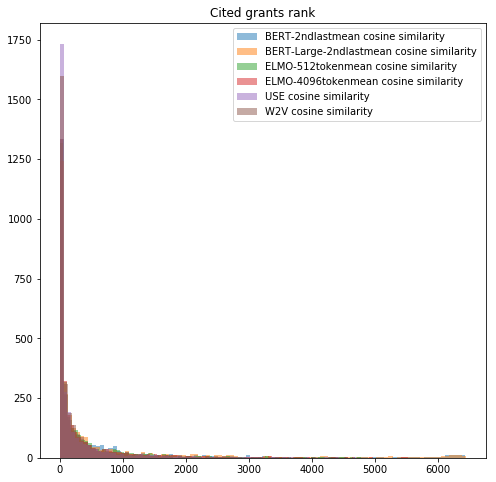

In [81]:
for model, ranking, _ in ranking_result:
  plt.hist(ranking, alpha=0.5, bins=100, label=f"{model} cosine similarity")

plt.title("Cited grants rank")
plt.legend()
plt.show()

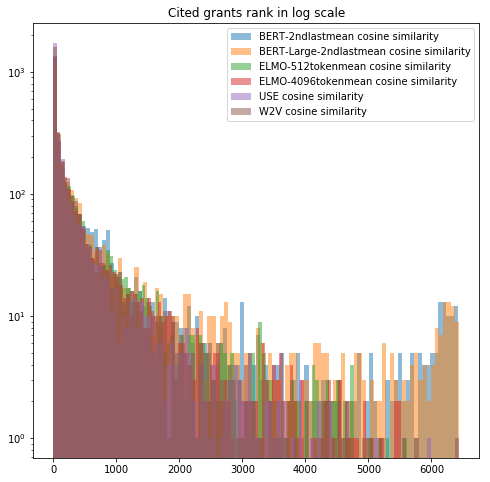

In [82]:
for model, ranking, _ in ranking_result:
  plt.hist(ranking, alpha=0.5, bins=100, label=f"{model} cosine similarity")

plt.yscale('log')
plt.title("Cited grants rank in log scale")
plt.legend()
plt.show()

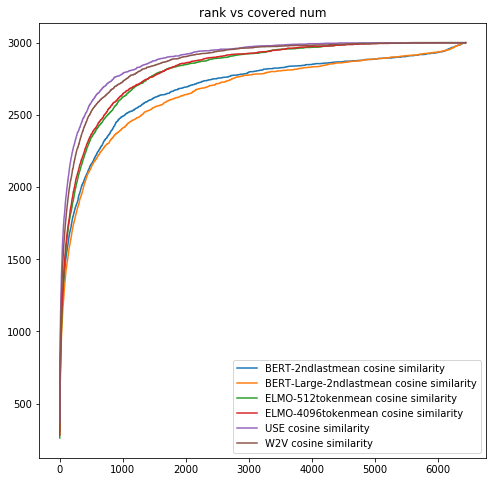

In [83]:
for model, _, positive_count in ranking_result:
  plt.plot(range(len(grants)), positive_count, label=f"{model} cosine similarity")

plt.title("rank vs covered num")
plt.legend()
plt.show()

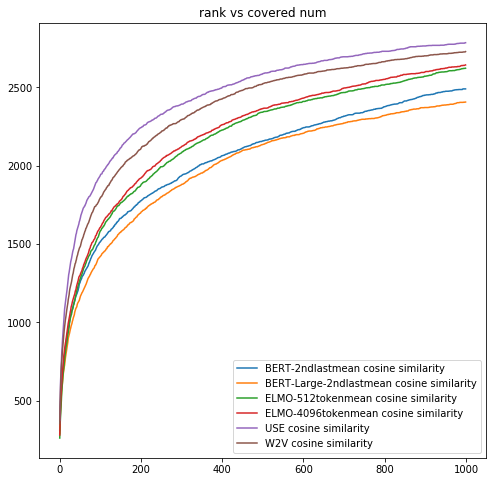

In [84]:
for model, _, positive_count in ranking_result:
  plt.plot(range(1000), positive_count[:1000], label=f"{model} cosine similarity")

plt.title("rank vs covered num")
plt.legend()
plt.show()

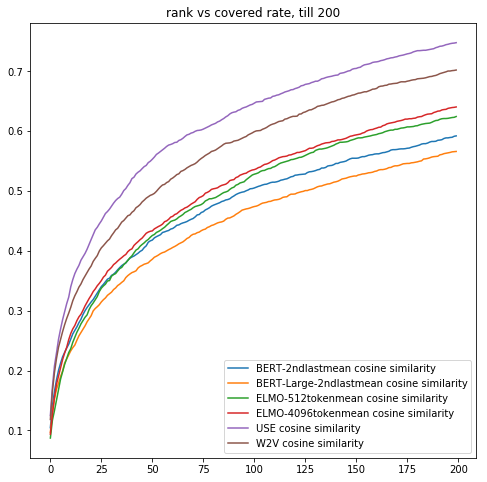

In [85]:
for model, ranking, positive_count in ranking_result:
  plt.plot(range(200), (np.array(positive_count)/len(ranking))[0:200], label=f"{model} cosine similarity")

plt.title("rank vs covered rate, till 200")
plt.legend()
plt.show()

In [86]:
for model, ranking, positive_count in ranking_result:
  print("-" * 20)
  print(f"{model} top 10: {(np.array(positive_count)/len(ranking))[10]:.4f}")
  print(f"{model} top 100: {(np.array(positive_count)/len(ranking))[100]:.4f}")
  print(f"{model} top 200: {(np.array(positive_count)/len(ranking))[200]:.4f}")

--------------------
BERT-2ndlastmean top 10: 0.2527
BERT-2ndlastmean top 100: 0.5050
BERT-2ndlastmean top 200: 0.5923
--------------------
BERT-Large-2ndlastmean top 10: 0.2330
BERT-Large-2ndlastmean top 100: 0.4740
BERT-Large-2ndlastmean top 200: 0.5680
--------------------
ELMO-512tokenmean top 10: 0.2367
ELMO-512tokenmean top 100: 0.5280
ELMO-512tokenmean top 200: 0.6260
--------------------
ELMO-4096tokenmean top 10: 0.2620
ELMO-4096tokenmean top 100: 0.5357
ELMO-4096tokenmean top 200: 0.6407
--------------------
USE top 10: 0.3400
USE top 100: 0.6467
USE top 200: 0.7480
--------------------
W2V top 10: 0.3057
W2V top 100: 0.5990
W2V top 200: 0.7037


## Trial and Erros

In [0]:
sim = compute_similarities(target_features_dict, "USE")

In [0]:
sim[0]

array([0.59243876, 0.49336826, 0.35891418, ..., 0.3547594 , 0.61351997,
       0.54102679])

In [0]:
ranking = compute_ranking(sim)

In [0]:
ranking[:3]

[14, 0, 789]

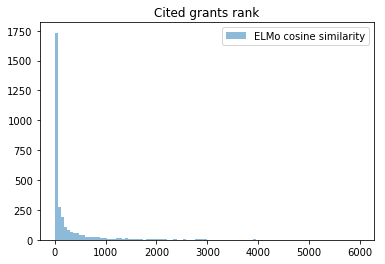

In [0]:
import matplotlib.pyplot as plt

plt.hist(ranking, alpha=0.5, bins=100, label="ELMo cosine similarity")
plt.title("Cited grants rank")
plt.legend()
plt.show()

In [0]:
%%time

tf, tl, tef, tel = _prepare_feature_for_labeled_data(target_features_dict, "ELMO-512tokenmean")

CPU times: user 25.7 s, sys: 199 ms, total: 25.9 s
Wall time: 25.8 s


In [0]:
tf

array([[ 0.04146077,  0.33466873, -0.02438193, ..., -0.05138287,
         0.35489544,  0.18244757],
       [ 0.19946417,  0.28654307, -0.03343014, ..., -0.16085735,
         0.07497395, -0.05243134],
       [ 0.24413267,  0.03050674, -0.2599768 , ..., -0.0933385 ,
         0.19614401,  0.1279701 ],
       ...,
       [ 0.15222813,  0.09087709, -0.13535395, ..., -0.05091184,
        -0.05838778, -0.03196971],
       [ 0.30256709,  0.24646774, -0.14956102, ..., -0.10359577,
         0.23123719,  0.00610641],
       [ 0.06816008,  0.33493641, -0.21586779, ..., -0.10068552,
         0.39663556,  0.11206492]])

In [0]:
train_app_f, test_app_f, grant_f = _read_feature(target_features_dict, "USE")

In [0]:
grant_f.shape

(6440, 512)

In [0]:
assert train_app_f.shape == (3000, 512)